# Matrix Transforms

 Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses

Copyright (c) 2018, Jed Frey.

## Reference

- [Coordinate Systems and Coordinate Transformations](http://ads.harvard.edu/books/1989fcm..book/Chapter2.pdf)
- [1.5 Coordinate Transformation of Vector Components](http://homepages.engineering.auckland.ac.nz/~pkel015/SolidMechanicsBooks/Part_III/Chapter_1_Vectors_Tensors/Vectors_Tensors_05_Coordinate_Transformation_Vectors.pdf)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

Color Key: 

- Blue: $\hat{i}$
- Orange: $\hat{j}$
- Green: Data point.

Coordinate System 1 Palette:


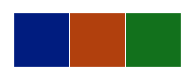

In [2]:
ccs_1_palette = sns.color_palette("dark", 3)
print("Coordinate System 1 Palette:")
sns.palplot(ccs_1_palette)

Cartesian Coordinate System 2 Palette:


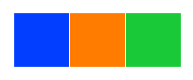

In [3]:
ccs_2_palette = sns.color_palette("bright", 3)
print("Cartesian Coordinate System 2 Palette:")
sns.palplot(ccs_2_palette)

Cartesian Coordinate System 3 Palette:


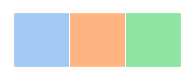

In [4]:
ccs_3_palette = sns.color_palette("pastel", 3)
print("Cartesian Coordinate System 3 Palette:")
sns.palplot(ccs_3_palette)

## Plot data in the cartesian coordinate system 1:

In [5]:
def redacted_fcn_jaf(X, Y, Z, origin):  
    #    This program is free software: you can redistribute it and/or modify
    #    it under the terms of the GNU General Public License as published by
    #    the Free Software Foundation, either version 3 of the License, or
    #    (at your option) any later version.
    #
    #    This program is distributed in the hope that it will be useful,
    #    but WITHOUT ANY WARRANTY; without even the implied warranty of
    #    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    #    GNU General Public License for more details.
    #
    #    You should have received a copy of the GNU General Public License
    #    along with this program.  If not, see <https://www.gnu.org/licenses/>.
    #
    # Documentation is Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
    #
    # Copyright (c) 2018, Jed Frey.

    X=np.array(X, dtype=np.float64).squeeze()
    Y=np.array(Y, dtype=np.float64).squeeze()
    Z=np.array(Z, dtype=np.float64).squeeze()
    origin=np.array(origin, dtype=np.float64).squeeze()

    # [REDACTED: ushr code]
    # [REDACTED: ushr code]
    
    M = np.zeros((4,4), dtype=np.float64)
    M[0:3,0]=X
    M[0:3,1]=Y
    M[0:3,2]=Z
    M[0:3,3]=origin
    M[3,3]=1

    return M

[[1.  0.5 0. ]]


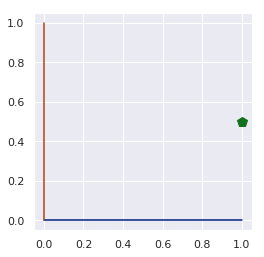

In [6]:
# Setup single data point in the current cartesian coordinate system
data_CCS1 = np.column_stack(([1], [0.5], [0]))

fig, (ax1) = plt.subplots(1, 1)
ax1.grid(True)
ax1.axes.set_aspect('equal')

# plot the current coordinate system
ax1.plot([0., 1.], [0.,0.], color=ccs_1_palette[0]) # current X-Axis
ax1.plot([0., 0.], [0.,1.], color=ccs_1_palette[1]) # current Y-Axis
ax1.plot(data_CCS1[:,0], data_CCS1[:,1], color=ccs_1_palette[2], marker="p", markersize=10)

print(data_CCS1)

## Define two more coordinate systems

We've defined points with respect to a coordinate system defined at [0,0]. Next let's create a two more cartesian coordinate systems:

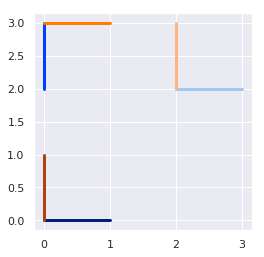

In [7]:
# plot the current coordinate system
plt.figure()
ax1=plt.subplot(1,1,1)
ax1.grid(True)
ax1.set_aspect('equal')

ax1.plot([0., 1.], [0.,0.], color=ccs_1_palette[0], linewidth=3) # CCS X-Axis
ax1.plot([0., 0.], [0.,1.], color=ccs_1_palette[1], linewidth=3) # CCS1 Y-Axis

ax1.plot([0., 0.], [3.,2.], color=ccs_2_palette[0], linewidth=3)  # CCS2 X-Axis
ax1.plot([0., 1.], [3.,3.], color=ccs_2_palette[1], linewidth=3)  # CCS2 X-Axis

ax1.plot([2., 3.], [2.,2.], color=ccs_3_palette[0], linewidth=3)  # CCS3 X-Axis
ax1.plot([2., 2.], [2.,3.], color=ccs_3_palette[1], linewidth=3)  # CCS3 X-Axis 

## Project the data into the new coordindate systems

Now let's create a Model Matrix ```M_1_2``` that transforms our data from the first cartesian coordinate system (CCS1) to the second cartesian coordinate system (CCS2). The output is below:

In [8]:
# Define a matrix that converts from CCS1 to CCS2
M_1_2 = redacted_fcn_jaf(
    X=[0., -1., 0.],
    Y=[1., 0., 0.],
    Z=[0., 0., 1.],
    origin=[0.,3.,0.],
)
M_1_2

array([[ 0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  3.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [9]:
# The inverse goes from CCS2 to CCS1
M_2_1 = np.linalg.inv(M_1_2)
M_2_1

array([[-0., -1., -0.,  3.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Now let's create a Model Matrix ```M_1_3``` that transforms our data from the first cartesian coordinate system (CCS1) to the third cartesian coordinate system (CCS3). The output is below:

In [10]:
# Define a matrix that converts from CCS1 to CCS3
M_1_3 = redacted_fcn_jaf(
    X=[1., 0., 0.],
    Y=[0., 1., 0.],
    Z=[0., 0., 1.],
    origin=[2.,2.,0.],
)
M_1_3

array([[1., 0., 0., 2.],
       [0., 1., 0., 2.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [11]:
# The inverse goes from CCS3 to CCS1
M_3_1 = np.linalg.inv(M_1_3)
M_3_1

array([[ 1.,  0.,  0., -2.],
       [ 0.,  1.,  0., -2.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

# Transform the data

Transform the data points so they are defined with respect to CCS2 & CCS3.

In [12]:
data_CCS2 = np.dot(data_CCS1, M_1_2[:3, :3].T) + np.squeeze(M_1_2[:3, 3:])
print(data_CCS2)

[[0.5 2.  0. ]]


In [13]:
data_CCS3 = np.dot(data_CCS1, M_1_3[:3, :3].T) + np.squeeze(M_1_3[:3, 3:])
print(data_CCS3)

[[3.  2.5 0. ]]


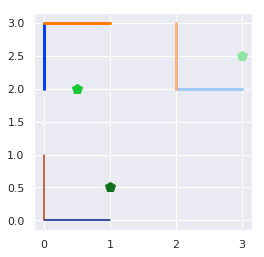

In [14]:
plt.figure()
ax1=plt.subplot(1,1,1)
ax1.grid(True)
ax1.set_aspect('equal')

# CCS1
ax1.plot([0., 1.], [0.,0.], color=ccs_1_palette[0]) # CCS1 X-Axis
ax1.plot([0., 0.], [0.,1.], color=ccs_1_palette[1]) # CCS1 Y-Axis
ax1.plot(data_CCS1[:,0], data_CCS1[:,1], color=ccs_1_palette[2], marker="p", markersize=10)

# CCS2
ax1.plot([0., 0.], [3.,2.], color=ccs_2_palette[0], linewidth=3)  # CCS2 X-Axis
ax1.plot([0., 1.], [3.,3.], color=ccs_2_palette[1], linewidth=3)  # CCS2 X-Axis 
ax1.plot(data_CCS2[:,0], data_CCS2[:,1], color=ccs_2_palette[2], marker="p", markersize=10)

# CCS3
ax1.plot([2., 3.], [2.,2.], color=ccs_3_palette[0], linewidth=3)  # CCS3 X-Axis
ax1.plot([2., 2.], [2.,3.], color=ccs_3_palette[1], linewidth=3)  # CCS3 X-Axis 
ax1.plot(data_CCS3[:,0], data_CCS3[:,1], color=ccs_3_palette[2], marker="p", markersize=10)